In [ ]:
import csv
import urllib
import urllib.request

In [ ]:
import os

path = '/content/drive/MyDrive/Term2_GroupWork/StreetViewImages/'

files = os.listdir(path)

for file in files:
  print(file)

print(len(files))


In [ ]:
api_file = open("/content/drive/MyDrive/api-key.txt", "r")
api_key = api_file.readline()
api_file.close()

In [ ]:
coordsPath = '/content/drive/MyDrive/Term2_GroupWork/CoordsCSVs/objects.csv'

In [ ]:
def accessAndUseCoords(pathOfCoords, start_index=0):
  locations = []
  with open(pathOfCoords, 'r') as csvfile:
    reader = csv.reader(csvfile)
    for i, row in enumerate(reader):
      if i < start_index:
        continue
      lat, lon = float(row[2]), float(row[1])
      location = (lat, lon)
      locations.append(location)
  return locations


In [ ]:
locations = accessAndUseCoords(coordsPath, 65)

In [ ]:
num_to_search = 41.0436159, 28.9937306
if num_to_search in locations:
    index = locations.index(num_to_search)
    print(f"{num_to_search} is in the list at index {index}")
else:
    print(f"{num_to_search} is not in the list")


(41.0436159, 28.9937306) is in the list at index 0


In [ ]:
locations[0]

(41.0436159, 28.9937306)

In [ ]:
len(locations)

1587

In [ ]:
1651 - 1587

64

In [ ]:
api_url = "https://maps.googleapis.com/maps/api/streetview?size=640x400&location={0},{1}&fov=90&heading={2}&pitch=0&radius=50&key={3}"
row = 2

In [ ]:
headings = [0, 45, 90, 135, 180, 225, 270, 315]

# Loop over every location, and for each location, loop over all the possible headings.
def obtainSVimages(pathOfFolderToSaveImages):
  row = 2
  for location in locations:
      for direction in headings:
          # Create the URL for the request to Google.
          lat, lon = location
          url = api_url.format(lat, lon, direction, api_key)

          # The filename save as, e.g. location-2-90.jpg.
          filename = str(pathOfFolderToSaveImages) + "/gsv-{2}-{0}-{1}.jpg".format(row, direction, location)

          # The 'curl' command to actually make the request and save the file to disk.
          urllib.request.urlretrieve(url, filename)
       
      # Increment the row to correlate with the Excel file.
      row += 1
    
      #Check that the code is running
      print("Done")

In [ ]:
pathToSave = '/content/drive/MyDrive/Term2_GroupWork/StreetViewImages/'

In [ ]:
obtainSVimages(pathToSave)

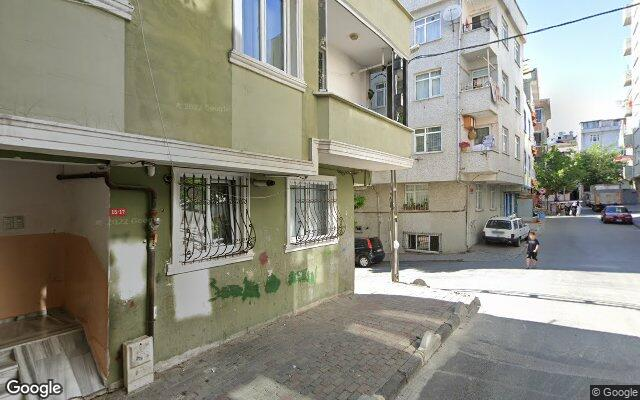

In [ ]:
from IPython.display import Image

image_index = 15001   

i = 0
for file_name in os.listdir(pathToSave):
    if file_name.endswith(".jpg"):
        if i == image_index:
            display(Image(filename=os.path.join(pathToSave, file_name)))
            break   
        i += 1
